In [176]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

%matplotlib inline

Xone  Xtwo   y
0    -1    -4  -8
1    -1    -5 -10
2     7    -9  -1
3     9     2   1
4     5     3   3

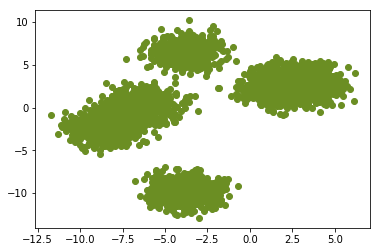

In [199]:
df = pd.read_csv('kmeans_dataset.csv')
plt.scatter(df.Xtwo, df.y, c='olivedrab')
df = df.drop('Unnamed: 0', axis=1)
df.head()

In [200]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4876 entries, 0 to 4875
Data columns (total 3 columns):
Xone    4876 non-null float64
Xtwo    4876 non-null float64
y       4876 non-null float64
dtypes: float64(3)
memory usage: 114.4 KB


Index(['Xone', 'Xtwo', 'y'], dtype='object')

# Elbow method to determine the ideal number of clusters

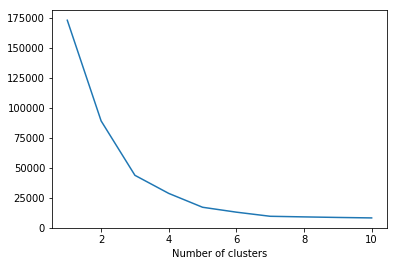

In [194]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(df.iloc[:, 0:-1]) # Using columns from index 0 to -1 aka Xone and Xtwo
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.show()

# Creating and fitting the KMeans algorithm

In [195]:
kmeans = KMeans(n_clusters=5, init='random', n_init=5)
y_kmeans = kmeans.fit_predict(X)

# Plotting the results

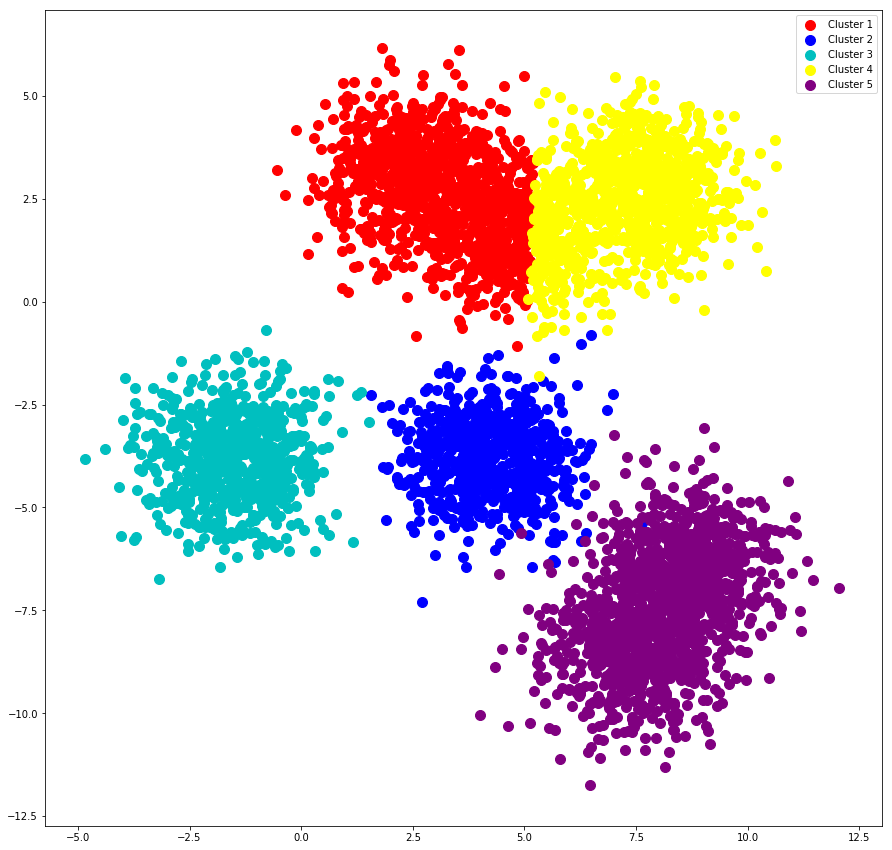

In [252]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()

ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'c', label = 'Cluster 3')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'purple', label = 'Cluster 5')

ax.legend()

# 3D plot with the whole dataframe

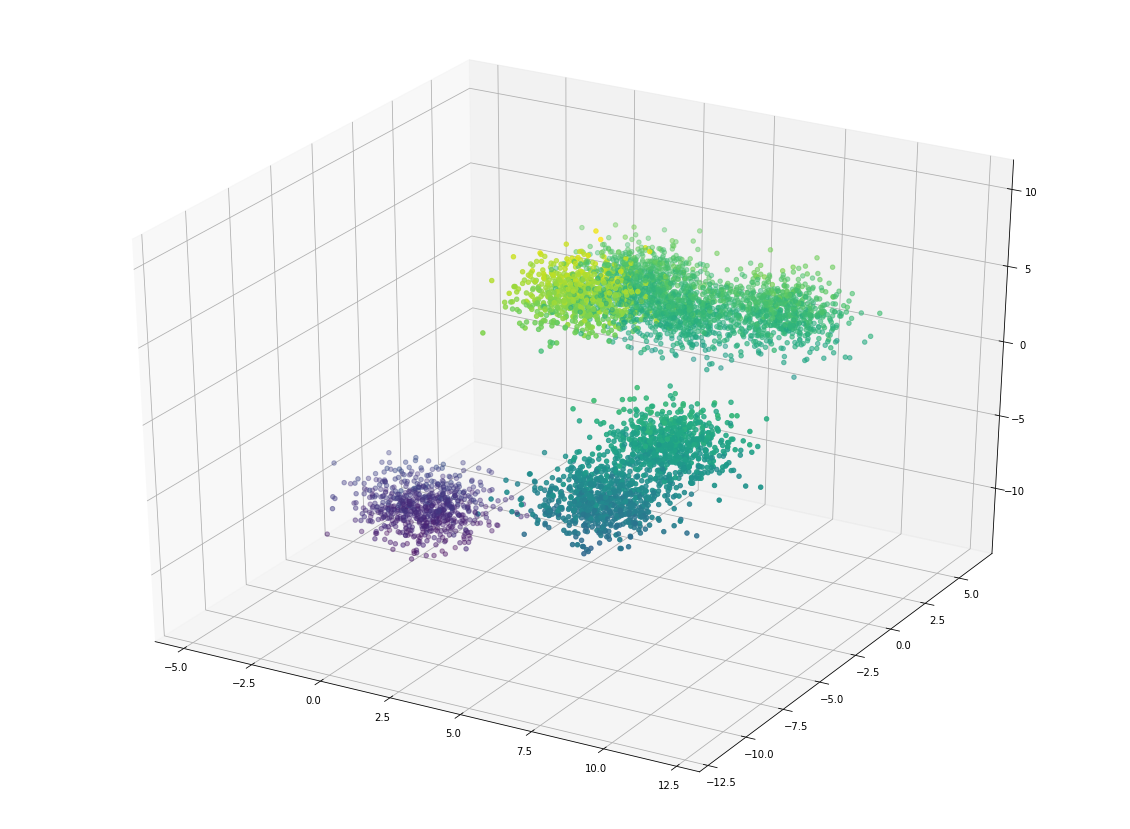

In [248]:
fig = plt.figure(figsize=(20, 15))
ax = fig.gca(projection='3d')

surf = ax.scatter(df.Xone, df.Xtwo, df.y, c=df.y)

plt.show()